In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('malaysia_produce.csv')
df2 = df[df.Element == 'Producer Price (LCU/tonne)'] #setting index to work on

## Distribution of Yearly Data to Produce Indexes 

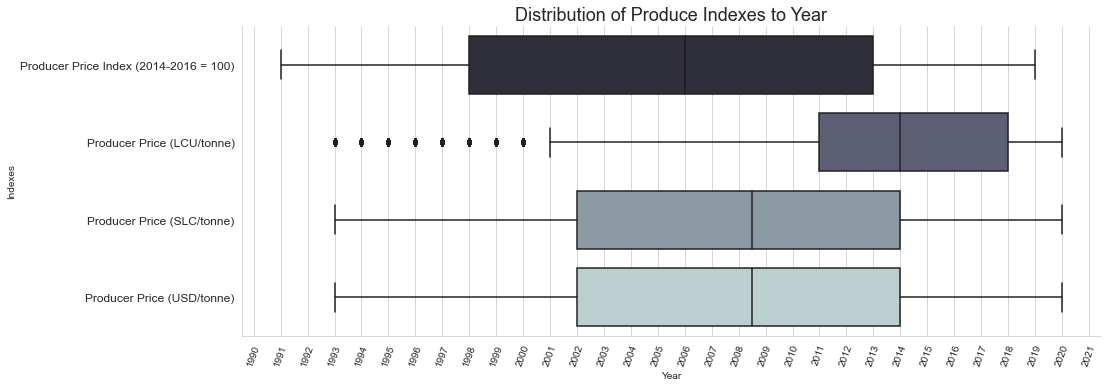

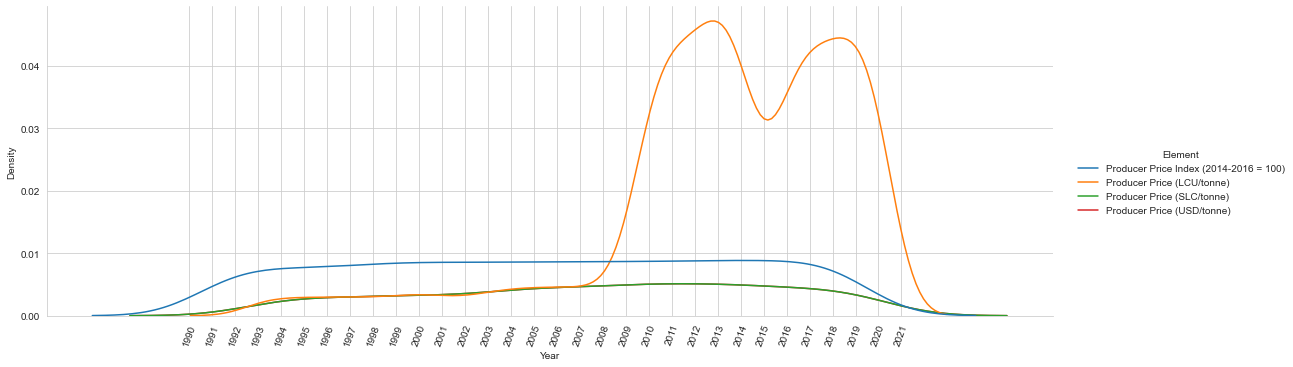

In [14]:
g = sns.catplot(data=df, x = 'Year', y = 'Element', kind = 'box', width = 0.75, aspect = 3, palette= 'bone')

# NOTE: set_xticks on the axis to determine the range of ticks to plot the data accordingly to
# then, plot the xticklabels to chart relevant labels to each point of tick
# must be done in correct order, set xtick to determine points > set xtick labels to label them

g.ax.set_xticks(np.arange(1990, 2022 ,1))
g.set_xticklabels(np.arange(1990, 2022 ,1), rotation = 70, fontsize = 'medium')
g.set_yticklabels(rotation = 0, fontsize = 'large')
g.ax.set_title('Distribution of Produce Indexes to Year', fontdict={'fontsize':18})
g.ax.set_xlabel('Year')
g.ax.set_ylabel('Indexes')
#g.axes_dict.items()

g = sns.displot(df, x = 'Year', kind = 'kde', aspect = 3, hue='Element')
g.ax.set_xticks(np.arange(1990, 2022 ,1))
g.set_xticklabels(np.arange(1990, 2022 ,1), rotation = 70, fontsize = 'medium')
plt.show()